<a href="https://colab.research.google.com/github/chaimabenabda2/Deep_Learning/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

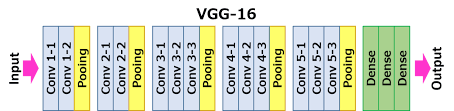

In [ ]:
#from IPython.display import Image
#Image('vgg16.png')

https://fr.wikipedia.org/wiki/ImageNet

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

**Preprocessing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_augmentation = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_generator = train_augmentation.flow_from_directory(
        '/content/drive/MyDrive/dataset/training_set',
        target_size=(128, 128),
        batch_size=128,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_augmentation = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = test_augmentation.flow_from_directory(
        '/content/drive/MyDrive/dataset/test_set',
        target_size=(128, 128),
        batch_size=128,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
conv_base = VGG16(input_shape=(128,128,3), include_top = False, weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator , steps_per_epoch = 8, epochs = 5, verbose = 2,
                    validation_data = validation_generator)

Epoch 1/5
8/8 - 815s - loss: 1.6751 - accuracy: 0.5127 - val_loss: 0.5946 - val_accuracy: 0.6505 - 815s/epoch - 102s/step
Epoch 2/5
8/8 - 760s - loss: 0.6382 - accuracy: 0.6504 - val_loss: 0.4912 - val_accuracy: 0.7810 - 760s/epoch - 95s/step
Epoch 3/5
8/8 - 671s - loss: 0.5044 - accuracy: 0.7588 - val_loss: 0.4161 - val_accuracy: 0.8200 - 671s/epoch - 84s/step
Epoch 4/5
8/8 - 679s - loss: 0.4422 - accuracy: 0.7988 - val_loss: 0.3913 - val_accuracy: 0.8160 - 679s/epoch - 85s/step
Epoch 5/5
8/8 - 662s - loss: 0.4112 - accuracy: 0.8066 - val_loss: 0.3432 - val_accuracy: 0.8520 - 662s/epoch - 83s/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

In [ ]:
epoch_count = range(1, len(training_loss)+1)

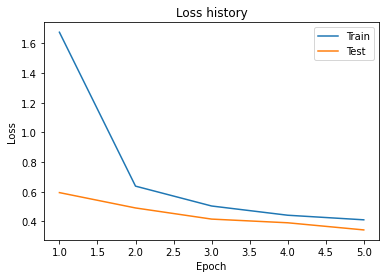

In [ ]:
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

In [ ]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

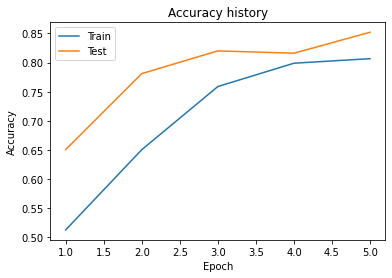

In [ ]:
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.title('Accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])